Jupyter kernel session started automatically.


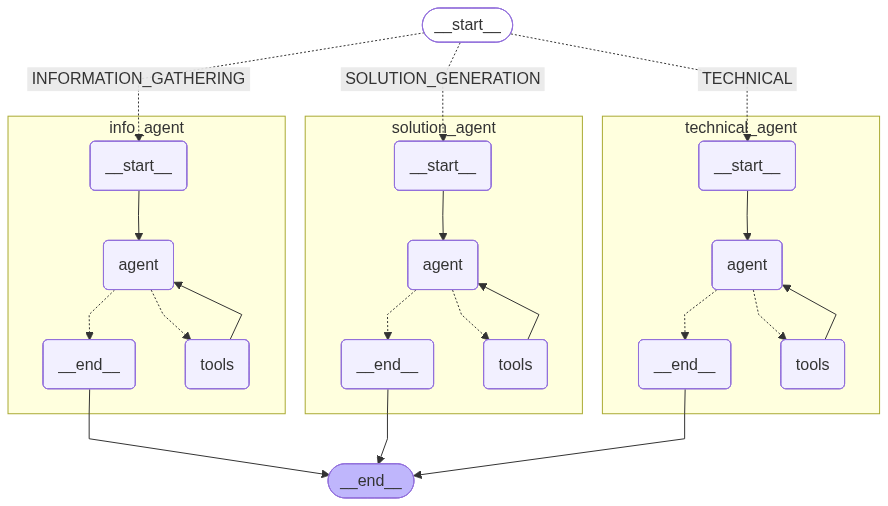

In [2]:
from costix.graph import CostixGraph
from langgraph.checkpoint.memory import MemorySaver
checkpoint=MemorySaver()

from IPython.display import display,Image

graph=CostixGraph(checkpointer=checkpoint)


display(Image(graph.graph.get_graph(xray=1).draw_mermaid_png()))


In [2]:
thread_id='2'
config={'configurable':{'thread_id':thread_id}}


In [3]:
import json
graph.graph.get_state(config).values

{}

In [4]:
# initialize the graph state

from langchain_core.messages import HumanMessage
from costix.schemas import CostixPhase
# state={'current_phase':CostixPhase.TECHNICAL}
graph.initialize_thread(thread_id=thread_id)


In [5]:


user_input=input('Enter your message')



user_message=HumanMessage(content=user_input)
response=graph.invoke({'messages':[user_message]},config,debug=True)

ai_message=response['messages'][-1]
print('Ai Response:',ai_message.content)





[values] {'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='8074ab47-9bbd-4048-a286-d9c12707c79e')], 'messages_history': [], 'current_phase': <CostixPhase.INFORMATION_GATHERING: 'INFORMATION_GATHERING'>, 'thoughts': [], 'collected_data': [], 'solution': [], 'technical_requirements': [], 'uploaded_files': []}
[updates] {<CostixNodes.INFO_AGENT: 'info_agent'>: {'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='8074ab47-9bbd-4048-a286-d9c12707c79e'), AIMessage(content=[], additional_kwargs={'__openai_function_call_ids__': {'call_F8VnL9DJnI9uXyVNhX0ZxfbV': 'fc_68c021e620f48195ad6f36811daec0a30b32b955623cff3c'}}, response_metadata={'id': 'resp_68c021e50d9081959358e71af0bd42ce0b32b955623cff3c', 'created_at': 1757422053.0, 'metadata': {}, 'model': 'gpt-4.1-2025-04-14', 'object': 'response', 'service_tier': 'default', 'status': 'completed', 'model_name': 'gpt-4.1-2025-04-14'}, id='run--6f728577-2246-4a8c-aeb5-c824be426178-

In [6]:
response

{'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='8074ab47-9bbd-4048-a286-d9c12707c79e'),
  AIMessage(content=[], additional_kwargs={'__openai_function_call_ids__': {'call_F8VnL9DJnI9uXyVNhX0ZxfbV': 'fc_68c021e620f48195ad6f36811daec0a30b32b955623cff3c'}}, response_metadata={'id': 'resp_68c021e50d9081959358e71af0bd42ce0b32b955623cff3c', 'created_at': 1757422053.0, 'metadata': {}, 'model': 'gpt-4.1-2025-04-14', 'object': 'response', 'service_tier': 'default', 'status': 'completed', 'model_name': 'gpt-4.1-2025-04-14'}, id='run--6f728577-2246-4a8c-aeb5-c824be426178-0', tool_calls=[{'name': 'conversation_tool', 'args': {'conversation': {'response': "It looks like you haven't uploaded any files or provided initial project information yet. To get started with gathering requirements for your cloud project and cost estimation, could you please share some details about the project or upload any relevant files, such as requirements lists, architectural diagram

In [7]:
from costix.agents import get_info_agent

from costix.model import get_model



info_agent=get_info_agent(get_model())

In [8]:
from langgraph.prebuilt import create_react_agent

